Name:Pavithran MJ
Register Number:212223240112


In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

Name:Pavithran MJ
Register Number:212223240112


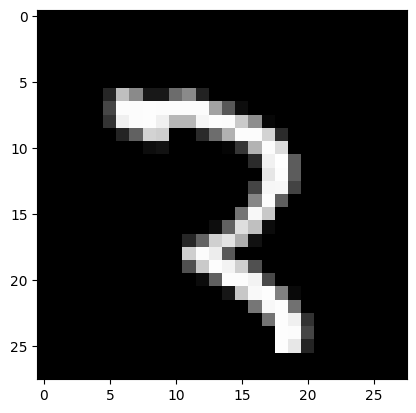

In [54]:
plt.imshow(single_image,cmap='gray')
print("Name:Pavithran MJ")

print("Register Number:212223240112")

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

Name:Pavithran MJ
Register Number:212223240112


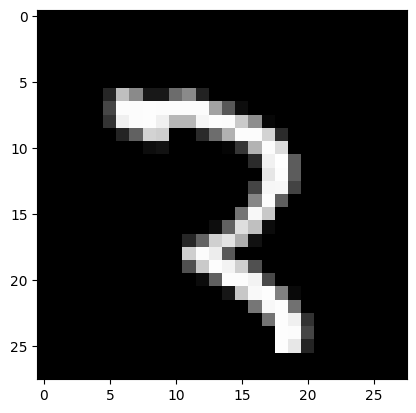

In [55]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
print("Name:Pavithran MJ")

print("Register Number:212223240112")

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [56]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
print("Name:Pavithran MJ")

print("Register Number:212223240112")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,906 (1.33 MB)

 Trainable params: 348,906 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

Name:Pavithran MJ
Register Number:212223240112


In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8619 - loss: 0.4628 - val_accuracy: 0.9766 - val_loss: 0.0744
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9779 - loss: 0.0741 - val_accuracy: 0.9788 - val_loss: 0.0664
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9853 - loss: 0.0503 - val_accuracy: 0.9835 - val_loss: 0.0501
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9838 - val_loss: 0.0487
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9831 - val_loss: 0.0575


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()


,accuracy,loss,val_accuracy,val_loss
0,0.933633,0.225330,0.9766,0.074393
1,0.978233,0.070673,0.9788,0.066441
2,0.985633,0.048663,0.9835,0.050065
3,0.988667,0.036261,0.9838,0.048655
4,0.991217,0.027606,0.9831,0.057547


Name:Pavithran MJ
Register Number:212223240112


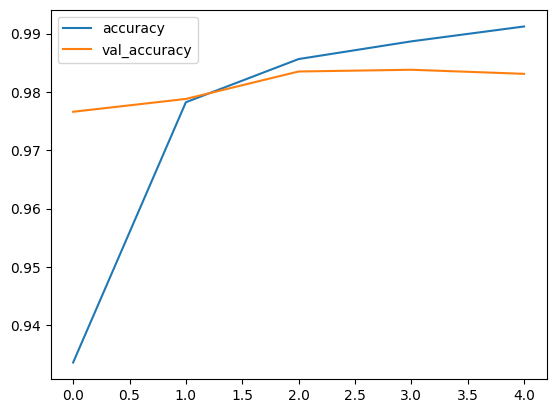

In [57]:
metrics[['accuracy','val_accuracy']].plot()
print("Name:Pavithran MJ")

print("Register Number:212223240112")

Name:Pavithran MJ
Register Number:212223240112


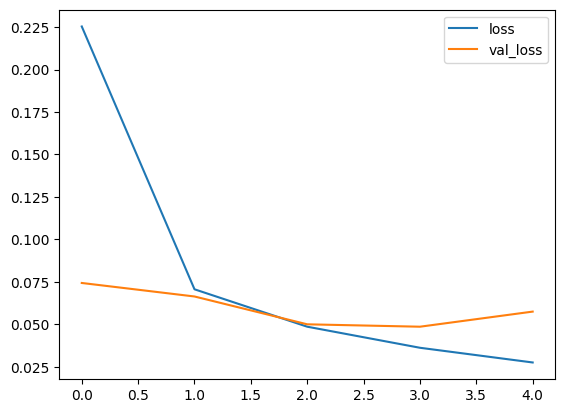

In [58]:
metrics[['loss','val_loss']].plot()
print("Name:Pavithran MJ")

print("Register Number:212223240112")

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [30]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 978    0    0    1    0    1    0    0    0    0]
 [   0 1127    2    2    0    0    1    1    1    1]
 [  11    2  990    9    3    0    1   11    4    1]
 [   1    0    0 1006    0    0    0    1    1    1]
 [   0    0    0    0  973    0    0    0    0    9]
 [   2    0    1   17    0  866    2    0    1    3]
 [   6    1    0    1    3    3  940    0    4    0]
 [   0    2    3    5    1    0    0 1007    2    8]
 [   7    0    1    8    0    0    0    1  952    5]
 [   3    0    0    3    7    2    0    1    1  992]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [43]:
img = image.load_img('four.png')

In [34]:
type(img)

PIL.Image.Image

In [44]:
img = image.load_img('four.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [46]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [47]:
print(x_single_prediction)

[3]


Name:Pavithran MJ
Register Number:212223240112


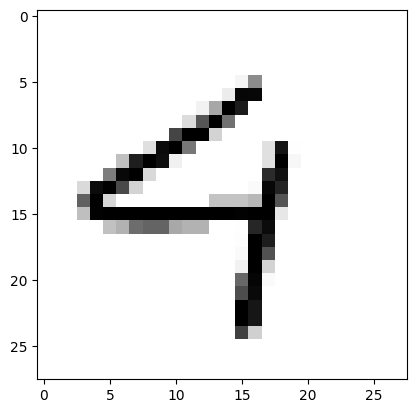

In [59]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("Name:Pavithran MJ")

print("Register Number:212223240112")

In [49]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [50]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [51]:
print(x_single_prediction)

[4]
